In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings #warning
warnings.filterwarnings('ignore')

In [351]:
#Load Data

df = pd.read_csv('loan.csv', low_memory=False)
pd.set_option('display.max_columns', None)

# Data Understanding

In [352]:
# Check the shape of the data

df.shape

(39717, 111)

In [353]:
# Check all the columns in the data

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [354]:
# Check the datatypes for each column

df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [355]:
# Check number of missing values for each column

df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [356]:
# Check all columns with all null values

missing_val_cols=df.columns[df.isna().sum()== df.shape[0]]

print(missing_val_cols)

print('Number of columns with missing values: ', missing_val_cols.size)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [357]:
# Checking the first 5 records

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [358]:
# Checking the number of unique data per column

df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [359]:
# Checking count of rows which have duplicate data

df.duplicated().sum()

0

# Data Cleaning and Manipulation

In [447]:
# Remove all the columns from the dataframe which have missing values

df_clean = df.drop(columns= missing_val_cols)

In [448]:
df_clean.shape

(39717, 57)

In [449]:
# Removing all columns which has 1 unique value

df_clean.drop(columns=df_clean.columns[df_clean.nunique()==1], inplace=True)

In [450]:
df_clean.shape

(39717, 48)

In [451]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [452]:
# Checking max missing values across all rows

df_clean.isna().sum(axis=1).max()

7

In [453]:
df_clean.columns.sort_values()

Index(['addr_state', 'annual_inc', 'collection_recovery_fee', 'delinq_2yrs',
       'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',
       'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status',
       'zip_code'],
      dtype='object')

In [713]:
#Analysing url
df_clean.url.value_counts()

# Seems to have no relevance.Hence can be dropped from analysis

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=562133     1
https://lendingclub.com/browse/loanDetail.action?loan_id=558545     1
https://lendingclub.com/browse/loanDetail.action?loan_id=562256     1
https://lendingclub.com/browse/loanDetail.action?loan_id=562224     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=774290     1
https://lendingclub.com/browse/loanDetail.action?loan_id=774295     1
https://lendingclub.com/browse/loanDetail.action?loan_id=772732     1
https://lendingclub.com/browse/loanDetail.action?loan_id=774265     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 38577, dtype: int64

In [716]:
#Analysing title
df_clean.title.value_counts()

# Seems to be customer provided random text.Hence can be dropped from analysis

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [715]:
#Analysing desc
df_clean.desc.value_counts()

# Seems to be customer provided random text.Hence can be dropped from analysis

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      209
Debt Consolidation                                                                                                                                                                                                                                                                                                                                                            

only first 3 digits of the Zipcode is provided. So this can be dropped.

In [844]:
# Dropping columns which has no relevance for charged off analysis

df_clean.drop(columns=['url', 'desc', 'title', 'zip_code','earliest_cr_line'], inplace=True)

KeyError: "['url', 'desc', 'title', 'zip_code'] not found in axis"

# Visualization Common Functions

In [744]:
# Custom method to draw histogram

def histogram(df, xlabel, ylabel, title,xattr,yattr=None, isKDE=True, hue=None, hue_order=None, bins=None):
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order, bins=bins)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    


In [519]:
# Custom method to draw histogram

def distplot(df, xlabel, ylabel,title,xattr, yattr=None, isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.displot(data=df, x=xattr, y=yattr,kde=isKDE, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    


In [795]:
# Custom method to draw barplot

def barplot(df, xlabel, ylabel,title,xattr,displayOrder=None, yattr=None, isKDE=True, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order, order=displayOrder)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    


In [516]:
# Custom method to draw boxplot

# Box Plot
def boxplot(df, xlabel, ylabel, title, xattr=None,yattr=None, hue=None, hue_order=None):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=xattr, y=yattr, hue=hue, hue_order=hue_order)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Derived univariate analysis

In [771]:
def chargedOffLoanPercentageUnivariate(df, attr):
    # Filtering out all loan data which is "Fully paid"
    df_fp =df[df.loan_status=="Fully Paid"]

    #Filtering out all loan data which is "Charged Off"
    df_co =df[df.loan_status=="Charged Off"]
    
    # Group all the "Fully Paid" loan data by home ownership and calculate the occurance count

    df_fp_attr = df_fp.groupby(by=attr, sort=True)["id"].count().reset_index()

    # Group all the "Charged off" loan data by home ownership and calculate the occurance count
    df_co_attr = df_co.groupby(by=attr, sort=True)["id"].count().reset_index()

    #Indexing the dataframes on home_ownership
    df_fp_attr.set_index(attr, inplace=True)
    df_co_attr.set_index(attr, inplace=True)
    
    #Adding the full paid group by home ownership count to charged off dataframe
    df_co_attr["fully paid"] = df_fp_attr["id"]
    #calculate the percentage of "charged off" loans count on total "charged off" and "fully paid" loan count  
    df_co_attr["charged off percentage"]= df_co_attr.apply(lambda x: x["id"]*100/(x["fully paid"]+x["id"]), axis=1)
    df_co_attr.reset_index(inplace=True)
    df_co_attr.rename(columns = {'id':'charged off'}, inplace = True)
    print(df_co_attr)
    
    return df_co_attr



# Univariate Analysis

## loan_status

- Current status of the loan

- <b><i>This is a unordered categorical variable</i></b>

In [720]:
# Checking all loan status

df_clean.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [721]:
df_clean.shape

(38577, 44)

In [722]:
# Removing all loan status which are in currently in progress as these wont be used for analysis.

df_clean = df_clean[~(df_clean.loan_status == "Current")]

In [723]:
df_clean.shape

(38577, 44)

## Customer Attributes

### 1. addr_state - 
The state provided by the borrower in the loan application

<b><i>This is a unordered categorical variable.</i></b>

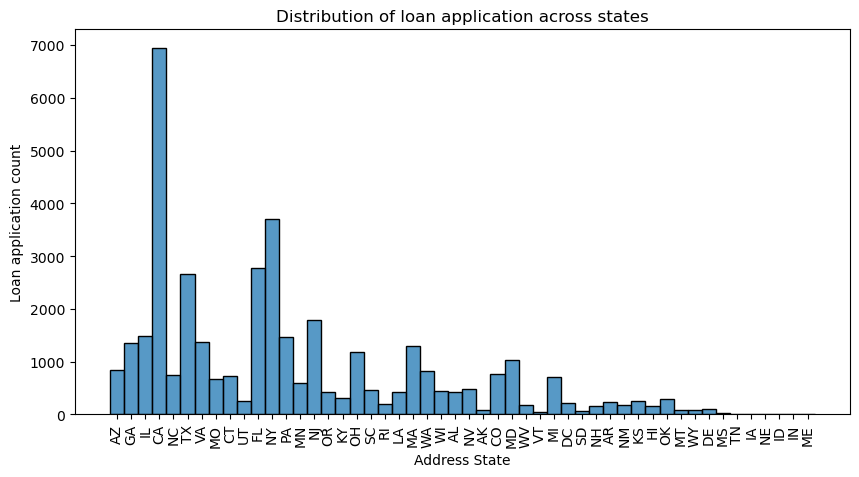

In [461]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="addr_state")
plt.xticks(rotation=90)
plt.xlabel("Address State")
plt.ylabel("Loan application count")
plt.title("Distribution of loan application across states")
plt.show()

In [462]:
df_clean.groupby(by="addr_state", sort=True)["addr_state"].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

,addr_state,Count
4,CA,6949
33,NY,3698
9,FL,2781
42,TX,2659
30,NJ,1790
14,IL,1478
37,PA,1468
44,VA,1369
10,GA,1359
19,MA,1297


The graph shows that maximum loans are applied from California. Other states which have the max trend of borrowing are New York, Florida, Texas, New Jercy in the descreasing order. 


In [724]:
df_co_as=chargedOffLoanPercentageUnivariate(df_clean, "addr_state")

In [727]:
df_co_as

,addr_state,id,full,perc
0,AK,15,63,19.230769
1,AL,54,381,12.413793
2,AR,27,208,11.489362
3,AZ,123,726,14.487633
4,CA,1125,5824,16.189380
5,CO,98,668,12.793734
6,CT,94,632,12.947658
7,DC,15,196,7.109005
8,DE,12,101,10.619469
9,FL,504,2277,18.122977


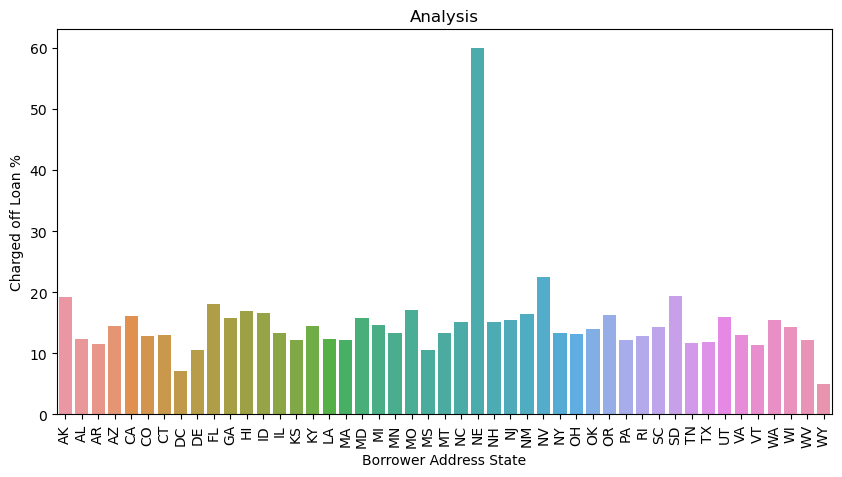

In [728]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_as, xattr="addr_state", yattr="perc", xlabel="Borrower Address State", ylabel="Charged off Loan %", title="Analysis")

### Analysis -

- All address state except NE has a low charged off loan percentage.
- Additionally even though NE has a high percentage, the total number of loans from NE is just 3 out of which 2 have charged off. This loan count is too low for a period of 4 years (2007-2011) to make any meaningful pattern out of it. Thus can be ignored.

### 2. annual_inc - 

Annual Income of the borrower.

<b><i>This is a quantitative categorical variable.</i></b>

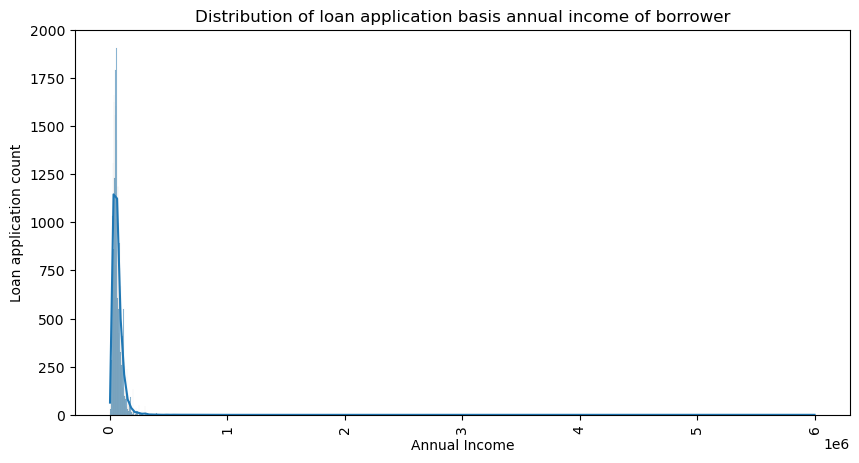

In [463]:
histogram(df_clean, "annual_inc","Annual Income","Loan application count", "Distribution of loan application basis annual income of borrower")

In [464]:
df_clean.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [465]:
df_clean.shape

(38577, 48)

In [467]:
# Above analysis on the annual income shows the data is skewed. So removing the outliers. 

q3, q1 = np.percentile(df_clean["annual_inc"], [75 ,25])
print("90 percentile of borrowers annual income ", q3)
print("10 percentile of borrowers annual income ", q1)
iqr = q3 - q1
outliers = q3 + 1.5*iqr
df_c = df_clean[df_clean["annual_inc"]<outliers]

90 percentile of borrowers annual income  82000.0
10 percentile of borrowers annual income  40000.0


In [469]:
df_c.shape

(36754, 48)

In [470]:
df_c.annual_inc.describe()

count     36754.000000
mean      61079.142225
std       28040.679299
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

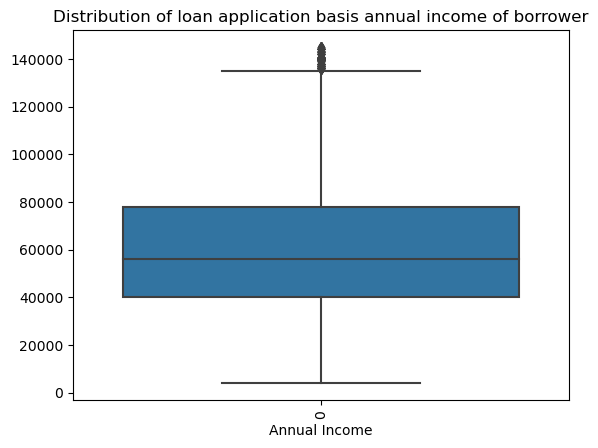

In [471]:
#Box plot after removing the outliers
sns.boxplot(data=df_c.annual_inc)
plt.xticks(rotation=90)
plt.xlabel("Annual Income")
plt.title("Distribution of loan application basis annual income of borrower")
plt.show()

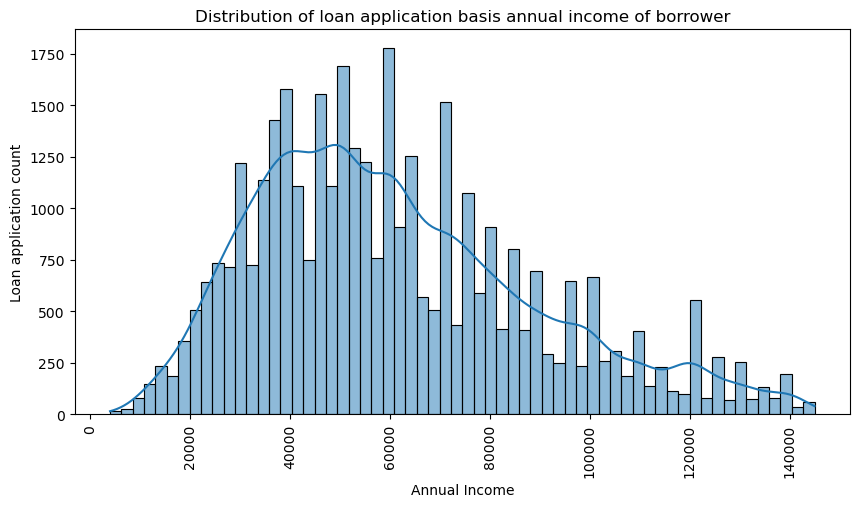

In [472]:
# Distribution Plot after removing the outliers

plt.figure(figsize=(10,5))
sns.histplot(data=df_c, x="annual_inc",kde=True)
plt.xticks(rotation=90)
plt.xlabel("Annual Income")
plt.ylabel("Loan application count")
plt.title("Distribution of loan application basis annual income of borrower")
plt.show()

<b>The above analysis shows the density distribution of a borrower basis his annual income. It shows annual income range of 40k to 80k has the maximum density of locan application count.</b>

##### Segmented Univariate Analysis

In [474]:
df_c.annual_inc.describe()

count     36754.000000
mean      61079.142225
std       28040.679299
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      144997.000000
Name: annual_inc, dtype: float64

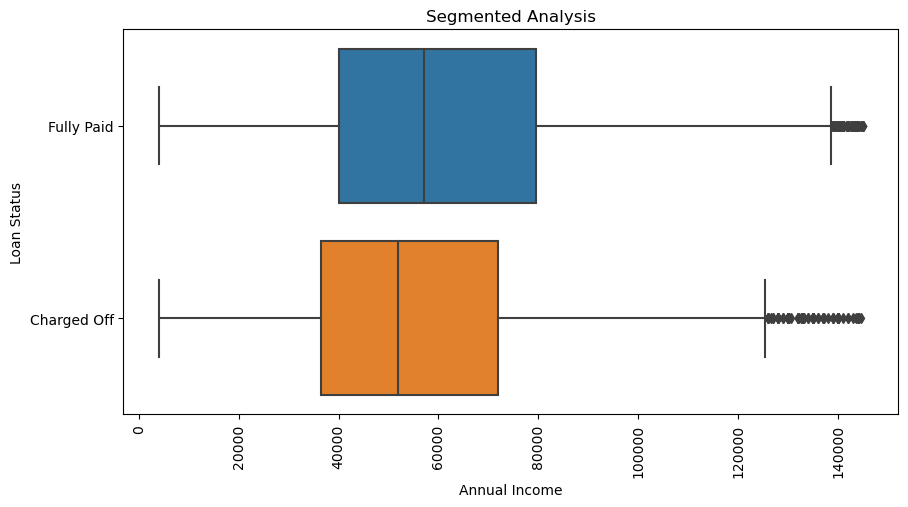

In [486]:
# Box plot to analyze how annual income can affect the loan getting defaulted.

boxplot(df_c, "Annual Income", "Loan Status", "Segmented Analysis" , "annual_inc","loan_status")

In [499]:
#### Analysis

print("Median annual income in case the loan -")
print("1. Charged Off - ", np.quantile(df_c[df_c.loan_status=="Charged Off"]["annual_inc"],.5))
print("2. Fully Paid - ", np.quantile(df_c[df_c.loan_status=="Fully Paid"]["annual_inc"],.5))

print("\nIQR of annual income in case loan status is - ")
print("1. Charged Off - ", np.quantile(df_c[df_c.loan_status=="Charged Off"]["annual_inc"],.25),"-",np.quantile(df_c[df_c.loan_status=="Charged Off"]["annual_inc"],.75))
print("2. Fully Paid - ", np.quantile(df_c[df_c.loan_status=="Fully Paid"]["annual_inc"],.5),"-",np.quantile(df_c[df_c.loan_status=="Fully Paid"]["annual_inc"],.75))

print("\nConclusion- \nRange of annual income for defaulters is less than the borrowers who have fully paid their loan.")

Median annual income in case the loan -
1. Charged Off -  51996.0
2. Fully Paid -  57204.0

IQR of annual income in case loan status is - 
1. Charged Off -  36400.0 - 72000.0
2. Fully Paid -  57204.0 - 79500.0

Conclusion- 
Range of annual income for defaulters is less than the borrowers who have fully paid their loan.


#### 3. home_ownership

- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    
- <b><i>This is unordered categorical data.</i></b>

<Figure size 1000x500 with 0 Axes>

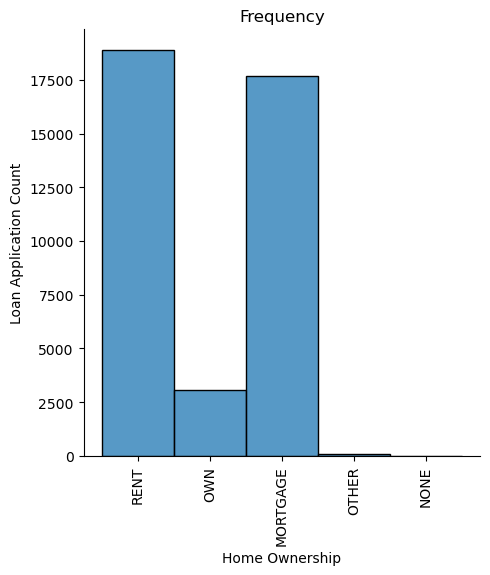

In [315]:
# Distribution Plot based on Home Ownership

distplot(df_clean, "home_ownership", "Home Ownership", "Loan Application Count", "Frequency")

<b>Analysis -

Borrowers who donot have own a property tend to apply for loan more than who own thier own house.

In [699]:
# Analysing charged off loan status against home ownership

df_co_ho = chargedOffLoanPercentageUnivariate(df_el, "home_ownership")

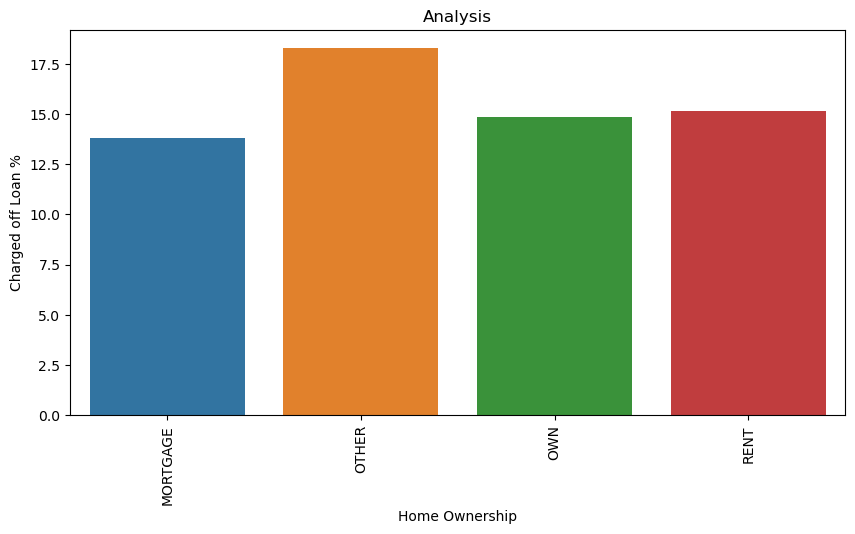

In [700]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_ho, xattr="home_ownership", yattr="perc", xlabel="Home Ownership", ylabel="Charged off Loan %", title="Analysis")

#### Analysis 

This shows that home ownership does not have any significant impact on loan being charged off.

In [672]:
df_c.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'emp_length_number'],
      dtype='object')

#### emp_length

- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

- <b><i>This is a ordered categorical variable.</i></b>

In [675]:
df_c.emp_length.value_counts()

10+ years    7923
< 1 year     4338
2 years      4112
3 years      3832
4 years      3206
1 year       3052
5 years      3051
6 years      2078
7 years      1646
8 years      1347
9 years      1154
Name: emp_length, dtype: int64

In [676]:
# deriving emp_length_number column by converting string in "emp_length" to ordered categorical integer variable
# Considering that employment length of 10 represents all employment length of 10+ years
# Considering that employement length of 0 represents all employment length of <1 year
df_c["emp_length_number"]= df_c.emp_length.apply(lambda x: str(x).replace(' years','').replace('+','').replace('< 1','0').replace(' year',''))

In [677]:
df_c.emp_length.isna().sum()

1015

In [678]:
# employee length dataframe excluding the records without emp_length information
df_el= df_c[~df_c.emp_length.isna()]

In [682]:
# Converting emp_length_number to int
df_el["emp_length_number"]= df_el.emp_length_number.apply(lambda x: int(x))

In [683]:
df_el.emp_length_number.value_counts()

10    7923
0     4338
2     4112
3     3832
4     3206
1     3052
5     3051
6     2078
7     1646
8     1347
9     1154
Name: emp_length_number, dtype: int64

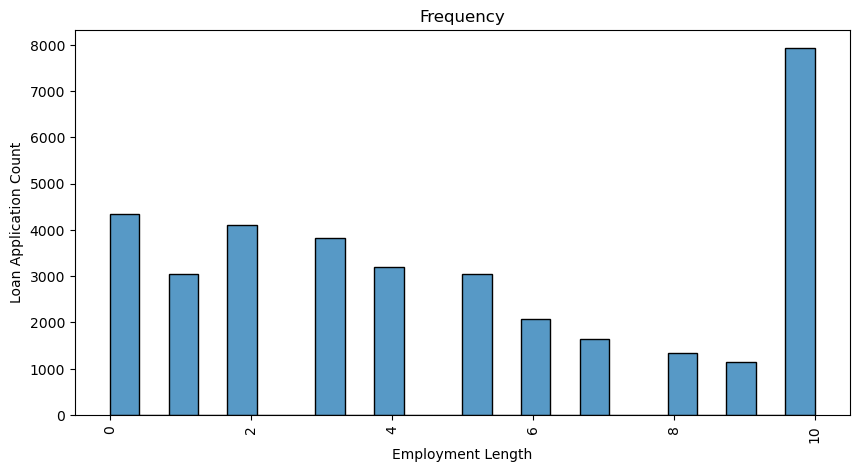

In [687]:
# Count of loan application vs employment length for a borrower
histogram(df_el,"Employment Length", "Loan Application Count", "Frequency","emp_length_number", isKDE=False)

In [701]:
# Analysing charged off loan status against employee length
df_co_el = chargedOffLoanPercentageUnivariate(df_el, "emp_length_number")

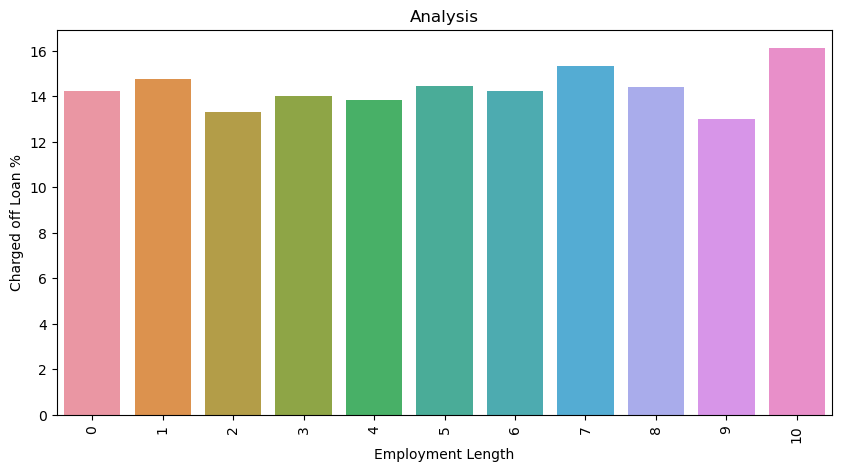

In [702]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_el, xattr="emp_length_number", yattr="perc", xlabel="Employment Length", ylabel="Charged off Loan %", title="Analysis")

### Segmented Univariate Analysis

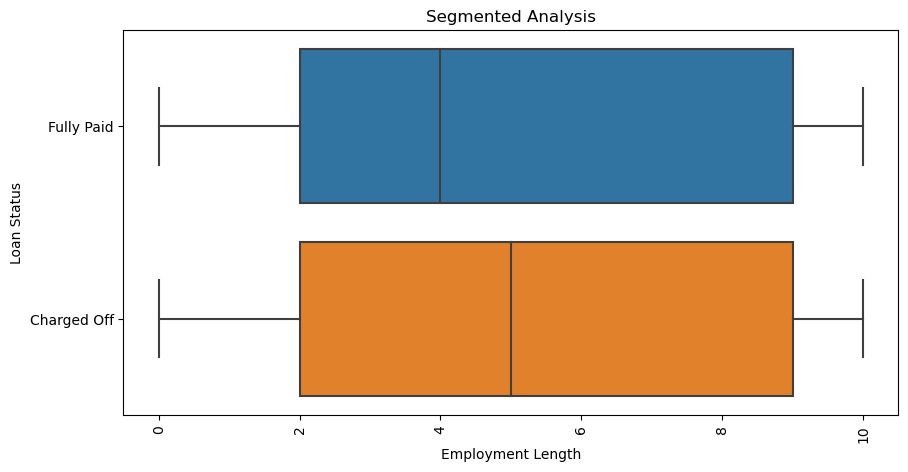

In [707]:
# Box plot to analyze how employee length can affect the loan getting defaulted.

boxplot(df_el, "Employment Length", "Loan Status", "Segmented Analysis" , "emp_length_number","loan_status")

#### Analysis -
The barplot and the boxplot shows there is negligible effect of employee length on the loan status becoming charged off.

In [730]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
## Issue_d

- The month-year on which the loan was funded


In [630]:
df_c.issue_d.value_counts()

Dec-11    1970
Nov-11    1965
Oct-11    1817
Sep-11    1794
Aug-11    1703
Jul-11    1662
Jun-11    1622
May-11    1534
Apr-11    1497
Mar-11    1367
Jan-11    1324
Feb-11    1244
Dec-10    1215
Jul-10    1085
Nov-10    1080
Oct-10    1077
Sep-10    1034
Aug-10    1033
Jun-10     991
May-10     889
Apr-10     793
Mar-10     698
Feb-10     592
Nov-09     570
Dec-09     556
Jan-10     555
Oct-09     516
Sep-09     428
Aug-09     391
Jul-09     355
Jun-09     340
May-09     305
Apr-09     280
Mar-09     269
Feb-09     252
Jan-09     229
Mar-08     225
Dec-08     207
Nov-08     180
Feb-08     169
Jan-08     164
Apr-08     146
Oct-08      89
Dec-07      82
Jul-08      82
May-08      69
Aug-08      67
Jun-08      65
Oct-07      46
Nov-07      34
Sep-08      29
Aug-07      28
Jul-07      24
Sep-07      15
Jun-07       1
Name: issue_d, dtype: int64

In [731]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Loan Attributes

#### Grade and sub_grade

- Grade -> LC assigned loan grade
- sub_grade -> LC assigned loan subgrade
- <b><i>This are unordered categorical variable.</i></b>

In [733]:
df_clean.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [734]:
df_clean.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [739]:
# Checking relation between grade and subgrade

df_clean[df_clean["grade"] == "A"]["sub_grade"].value_counts()
#df_clean[df_clean["grade"] == "B"]["sub_grade"].value_counts()
#df_clean[df_clean["grade"] == "C"]["sub_grade"].value_counts()

A4    2873
A5    2715
A3    1810
A2    1508
A1    1139
Name: sub_grade, dtype: int64

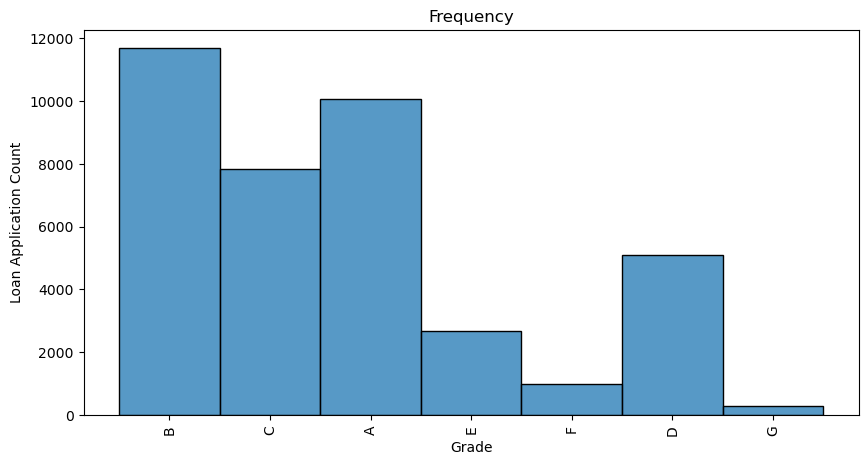

In [756]:
histogram(df_clean,"Grade", "Loan Application Count", "Frequency","grade", isKDE=False)

In [775]:
df_co_grade = chargedOffLoanPercentageUnivariate(df_clean, "grade")

  grade  charged off  fully paid  charged off percentage
0     A          602        9443                5.993031
1     B         1425       10250               12.205567
2     C         1347        6487               17.194281
3     D         1118        3967               21.986234
4     E          715        1948               26.849418
5     F          319         657               32.684426
6     G          101         198               33.779264


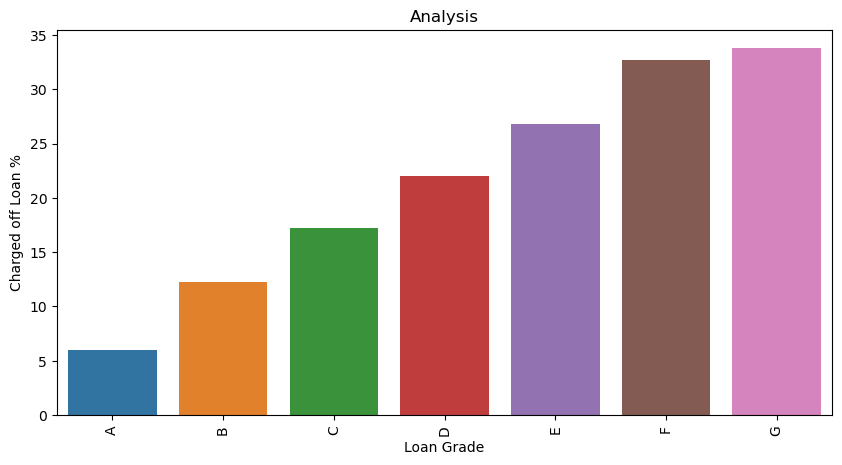

In [776]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_grade, xattr="grade", yattr="charged off percentage", xlabel="Loan Grade", ylabel="Charged off Loan %", title="Analysis")

#### Analysis:

- On overall grade analysis, the charged off loan percent is highest for grade G and least in grade A.
- The trend of charged off loan % against grade is a increasing order from grade A to grade G.

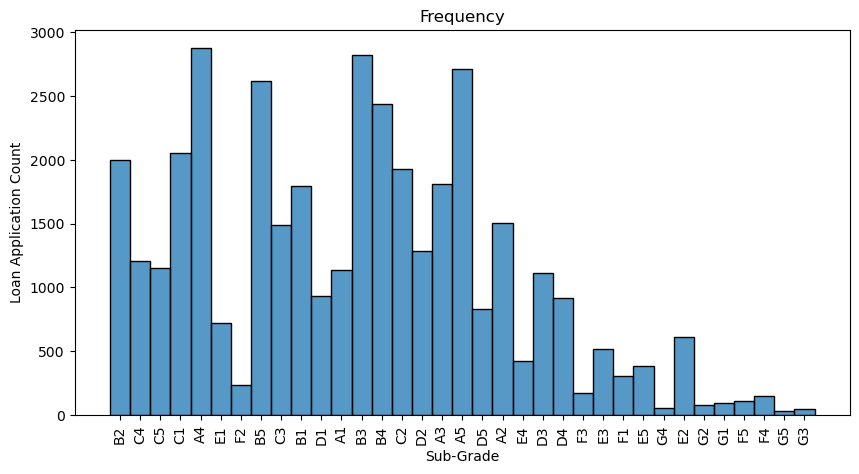

In [740]:
histogram(df_clean,"Sub-Grade", "Loan Application Count", "Frequency","sub_grade", isKDE=False)

In [772]:
df_co_sgrade = chargedOffLoanPercentageUnivariate(df_clean, "sub_grade")

   sub_grade  charged off  fully paid  charged off percentage
0         A1           30        1109                2.633889
1         A2           74        1434                4.907162
2         A3          103        1707                5.690608
3         A4          178        2695                6.195614
4         A5          217        2498                7.992634
5         B1          171        1626                9.515860
6         B2          228        1773               11.394303
7         B3          341        2484               12.070796
8         B4          329        2108               13.500205
9         B5          356        2259               13.613767
10        C1          336        1719               16.350365
11        C2          321        1610               16.623511
12        C3          270        1218               18.145161
13        C4          212         994               17.578773
14        C5          208         946               18.024263
15      

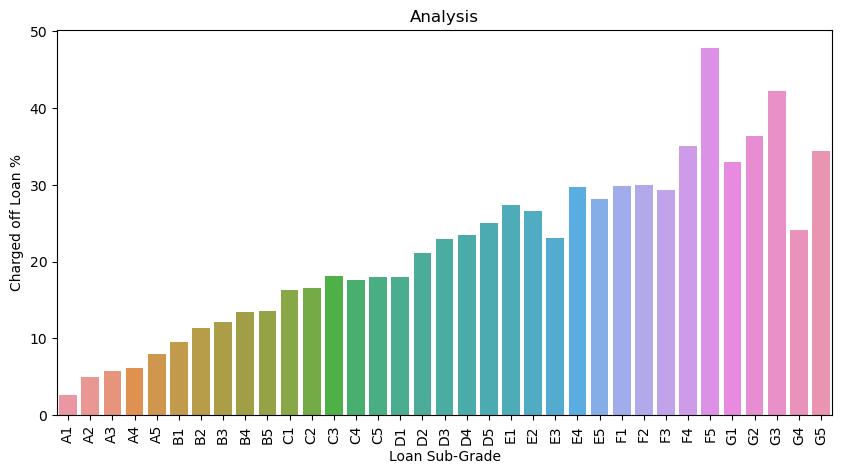

In [774]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_sgrade, xattr="sub_grade", yattr="charged off percentage", xlabel="Loan Sub-Grade", ylabel="Charged off Loan %", title="Analysis")

#### Analysis:

On overall grade analysis
- The charged off loan percent is highest for grade G and least in grade A.
- The trend of charged off loan % against grade is a increasing order from grade A to grade G.

On overall subgrade analysis
- The charged off loan percent is highest for F5 and then G3.

In [764]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### verification_status

- Indicates if income was verified by LC, not verified, or if the income source was verified
- <b><i>This is a unordered categorical variable.</i></b>

In [791]:
df_clean.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

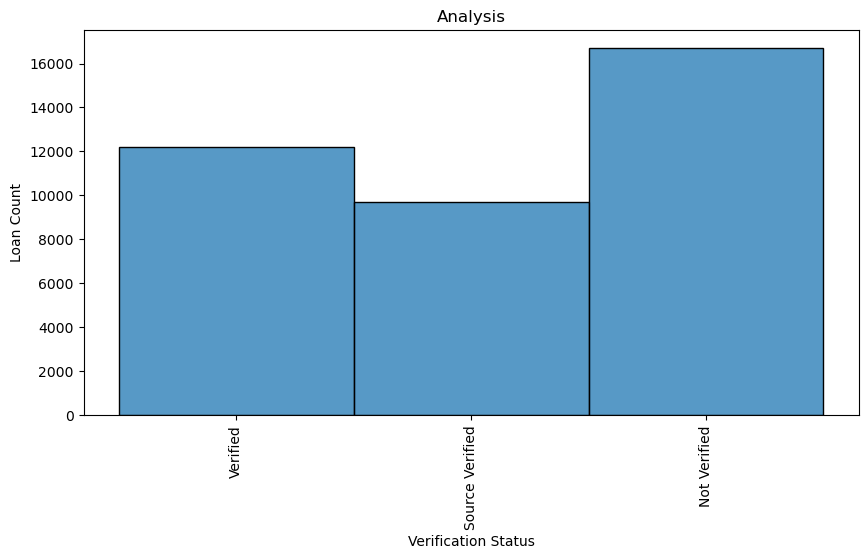

In [792]:
# Box plot to analyze how home ownership can affect the loan status getting defaulted.

histogram(df_clean, xattr="verification_status", xlabel="Verification Status", ylabel="Loan Count", title="Analysis", isKDE=False)

  verification_status  charged off  fully paid  charged off percentage
0        Not Verified         2142       14552               12.830957
1     Source Verified         1434        8243               14.818642
2            Verified         2051       10155               16.803212


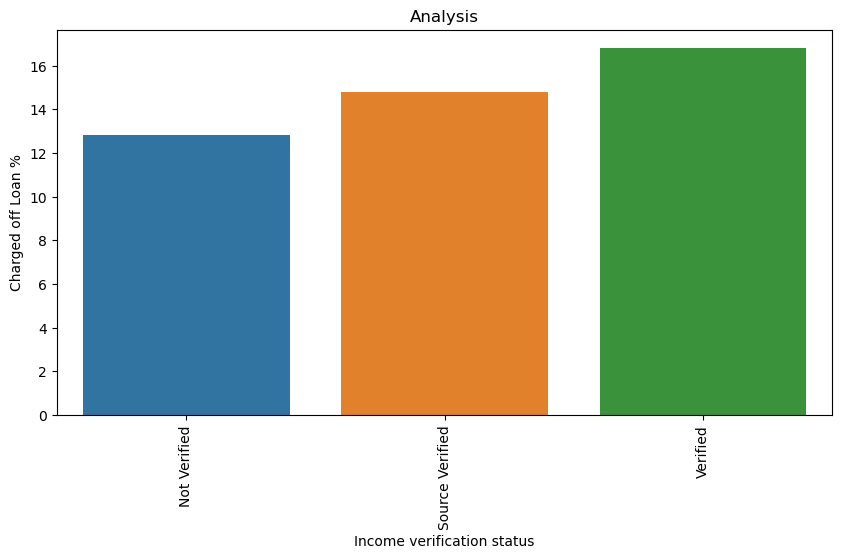

In [796]:
df_co_vs = chargedOffLoanPercentageUnivariate(df_clean, "verification_status")

# Box plot to analyze how home ownership can affect the loan status getting defaulted.

barplot(df_co_vs, xattr="verification_status", yattr="charged off percentage", xlabel="Income verification status", ylabel="Charged off Loan %", title="Analysis")

### Analysis:
  
- Number of loan application count basis verification status shows maximum number of loan applications donot have income verified.
- There is no major trend in the charged off loan acount % vs income verification status, but it is marginally higher for cases where the income source is verified. Since this is a minor % change, this should be ignored.

In [797]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## purpose

- A category provided by the borrower for the loan request. 

- <b><i>This is a unordered categorical variable.</i></b>

In [798]:
df_clean.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

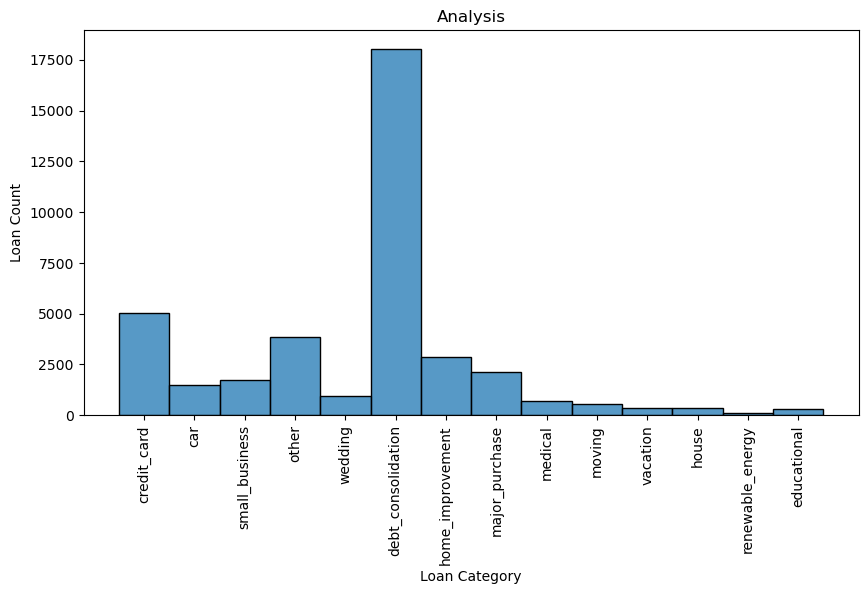

In [799]:
# Histogram plot to analyze how loan category can affect the loan status getting defaulted.

histogram(df_clean, xattr="purpose", xlabel="Loan Category", ylabel="Loan Count", title="Analysis", isKDE=False)

               purpose  charged off  fully paid  charged off percentage
0                  car          160        1339               10.673783
1          credit_card          542        4485               10.781778
2   debt_consolidation         2767       15288               15.325395
3          educational           56         269               17.230769
4     home_improvement          347        2528               12.069565
5                house           59         308               16.076294
6       major_purchase          222        1928               10.325581
7              medical          106         575               15.565345
8               moving           92         484               15.972222
9                other          633        3232               16.377749
10    renewable_energy           19          83               18.627451
11      small_business          475        1279               27.080958
12            vacation           53         322               14

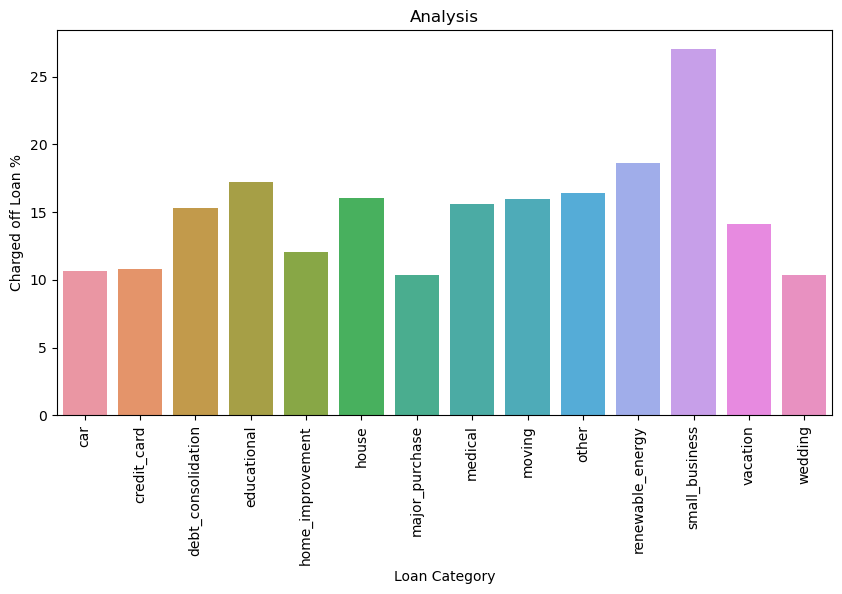

In [800]:
df_co_pur = chargedOffLoanPercentageUnivariate(df_clean, "purpose")

# Box plot to analyze how loan category can affect the loan status getting defaulted.

barplot(df_co_pur, xattr="purpose", yattr="charged off percentage", xlabel="Loan Category", ylabel="Charged off Loan %", title="Analysis")

### Analysis:
  
- Number of loan application count basis loan category(purpose) shows maximum number of loan applications are for debt consolidation.
- There is no major trend in the charged off loan acount % vs loan category(purpose), except it is higher for cases where the loan category is "small business" which is at 27% compared to next highest as 18% for renewable energy.

In [802]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## dti

- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

- <b><i>This is a quantitative categorical variable.</i></b>

In [803]:
df_clean.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [804]:
# Adding a modified dti column

df_clean["dti_mod"] = df.dti.apply(lambda x: np.round(x))

In [807]:
df_clean["dti_mod"].describe()

count    38577.000000
mean        13.273220
std          6.684078
min          0.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         30.000000
Name: dti_mod, dtype: float64

In [810]:
df_clean.dti_mod.value_counts()

14.0    2034
13.0    1967
15.0    1920
11.0    1865
12.0    1859
16.0    1853
10.0    1832
17.0    1763
9.0     1741
18.0    1739
8.0     1698
19.0    1654
20.0    1647
21.0    1461
7.0     1459
6.0     1420
22.0    1418
5.0     1270
23.0    1268
4.0     1167
24.0    1114
3.0      956
2.0      949
1.0      843
25.0     616
0.0      520
26.0     151
27.0     129
28.0     123
29.0     109
30.0      32
Name: dti_mod, dtype: int64

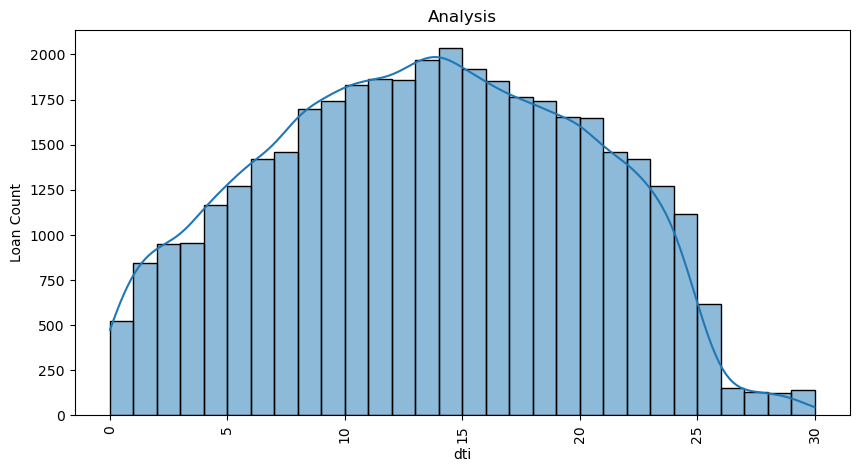

In [819]:
# Histogram plot to analyze how dti can affect the loan status getting defaulted.

histogram(df_clean, xattr="dti_mod", xlabel="dti", ylabel="Loan Count", title="Analysis", isKDE=True, bins=30)

### Segmented Univariate Analysis

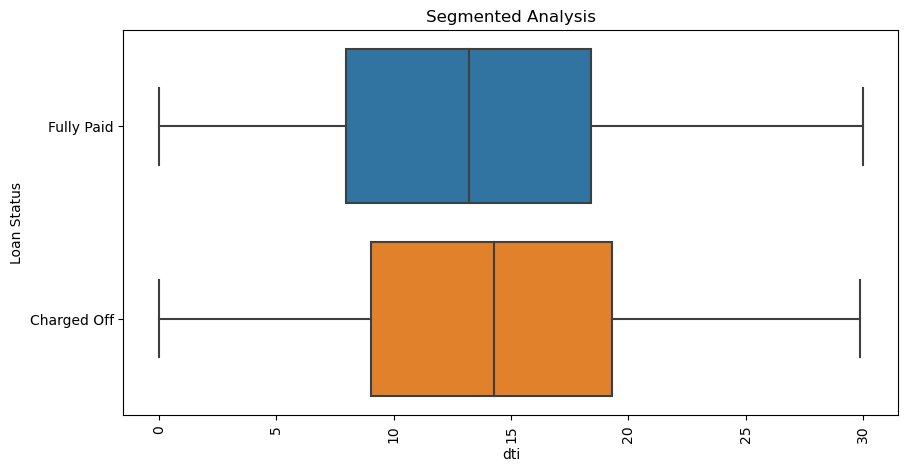

In [813]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_clean, xlabel="dti", ylabel="Loan Status", title="Segmented Analysis" , xattr="dti",yattr="loan_status")

In [826]:
df_fp_dti = df_clean[df_clean.loan_status=="Fully Paid"]["dti"]

df_fp_dti.describe()

count    32950.000000
mean        13.148421
std          6.680041
min          0.000000
25%          7.980000
50%         13.200000
75%         18.390000
max         29.990000
Name: dti, dtype: float64

In [828]:
df_co_dti = df_clean[df_clean.loan_status=="Charged Off"]["dti"]

df_co_dti.describe()

count    5627.000000
mean       14.000624
std         6.585577
min         0.000000
25%         9.050000
50%        14.290000
75%        19.290000
max        29.850000
Name: dti, dtype: float64

In [833]:
### Analysis 
print("Analysis -")

print("- The IQR for dti is ", np.quantile(df_clean["dti_mod"],.25),"-",np.quantile(df_clean["dti_mod"],.75))
print("- The IQR for dti for loan status as Fully Paid is ", np.quantile(df_fp_dti,.25),"-",np.quantile(df_fp_dti,.75))
print("- The IQR for dti for loan status as Charged off is ", np.quantile(df_co_dti,.25),"-",np.quantile(df_co_dti,.75))
print("- Median for Fully Paid is ",np.quantile(df_fp_dti,.5))
print("- Median for Charged Off is ",np.quantile(df_co_dti,.5))

print("- Above data shows the loan accounts with dti higher has higher chances to being Charged Off, although the margin is just 1% in the IQR range")

Analysis -
- The IQR for dti is  8.0 - 19.0
- The IQR for dti for loan status as Fully Paid is  7.98 - 18.39
- The IQR for dti for loan status as Charged off is  9.05 - 19.29
- Median for Fully Paid is  13.2
- Median for Charged Off is  14.29
- Above data shows the loan accounts with dti higher has higher chances to being Charged Off, although the margin is just 1% in the IQR range


In [834]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'dti_mod'],
      dtype='object')

#### inq_last_6mths

- <Description>

- <b><i>This is a quantitative categorical variable.</i></b>

In [845]:
df_clean.inq_last_6mths.value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

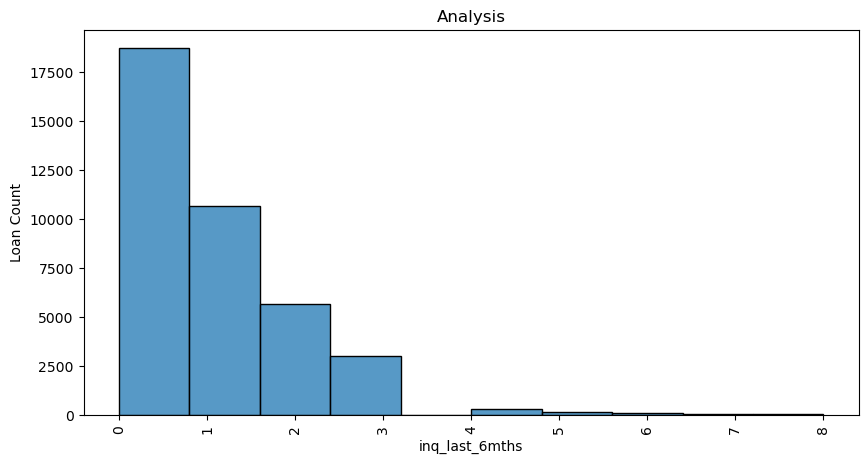

In [848]:

histogram(df_clean, xattr="inq_last_6mths", xlabel="inq_last_6mths", ylabel="Loan Count", title="Analysis", isKDE=False, bins=10)

In [850]:
df_fp_inq = df_clean[df_clean.loan_status=="Fully Paid"]["inq_last_6mths"]

df_fp_inq.describe()

count    32950.000000
mean         0.839909
std          1.053524
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [851]:
df_co_inq = df_clean[df_clean.loan_status=="Charged Off"]["inq_last_6mths"]

df_co_inq.describe()

count    5627.000000
mean        1.058113
std         1.154136
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: inq_last_6mths, dtype: float64

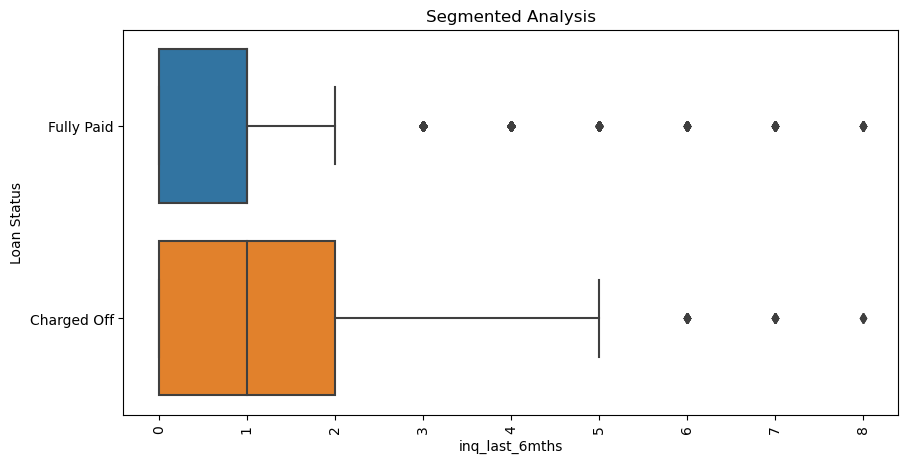

In [849]:
# Box plot to analyze how dti can affect the loan getting defaulted.

boxplot(df_clean, xlabel="inq_last_6mths", ylabel="Loan Status", title="Segmented Analysis" , xattr="inq_last_6mths",yattr="loan_status")

In [853]:
### Analysis 
print("Analysis -")

print("- The IQR is ", np.quantile(df_clean["inq_last_6mths"],.25),"-",np.quantile(df_clean["inq_last_6mths"],.75))
print("- The IQR for loan status as Fully Paid is ", np.quantile(df_fp_inq,.25),"-",np.quantile(df_fp_inq,.75))
print("- The IQR for loan status as Charged off is ", np.quantile(df_co_inq,.25),"-",np.quantile(df_co_inq,.75))
print("- Median for Fully Paid is ",np.quantile(df_fp_inq,.5))
print("- Median for Charged Off is ",np.quantile(df_co_inq,.5))

print("- Above data shows the loan accounts with inq_last_6mths higher has higher chances to being Charged Off (excluding the outliers)")

Analysis -
- The IQR is  0.0 - 1.0
- The IQR for loan status as Fully Paid is  0.0 - 1.0
- The IQR for loan status as Charged off is  0.0 - 2.0
- 100% for Fully Paid is  8
- 100% for Charged Off is  8
- Above data shows the loan accounts with inq_last_6mths higher has higher chances to being Charged Off (excluding the outliers)


In [854]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'dti_mod'],
      dtype='object')

In [856]:
df_clean.mths_since_last_delinq.value_counts()

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
        ... 
107.0      1
85.0       1
97.0       1
95.0       1
115.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

## mths_since_last_delinq

## open_acc

In [857]:
df_clean.mths_since_last_record.value_counts()

0.0      670
104.0     60
113.0     58
89.0      57
111.0     56
        ... 
14.0       1
46.0       1
7.0        1
83.0       1
5.0        1
Name: mths_since_last_record, Length: 111, dtype: int64

In [858]:
df_clean.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [859]:
df_clean.revol_bal.value_counts()

0        972
255       14
298       14
1         12
682       11
        ... 
36186      1
21450      1
38222      1
4236       1
85607      1
Name: revol_bal, Length: 21275, dtype: int64

In [860]:
df_clean.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [861]:
df_clean.total_acc.value_counts()

16    1424
15    1418
17    1411
14    1403
20    1390
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

In [862]:
df_clean.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

#### 1. collection_recovery_fee - This is post charge off collection fee

In [167]:
df_clean.collection_recovery_fee.describe()

count    39717.000000
mean        12.406112
std        148.671593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [168]:
df_clean.shape

(39717, 48)

Since this field signifies the recovery amount which is collected after the chargeoff, this does not have to do anything with analysis.
So this field can be dropped.

In [169]:
df_clean.drop(columns="collection_recovery_fee", inplace=True)

In [170]:
df_clean.shape

(39717, 47)

#### delinq_2yrs

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

- <b><i>This is a ordered categorical variable.</i></b>

In [181]:
df_clean.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11])

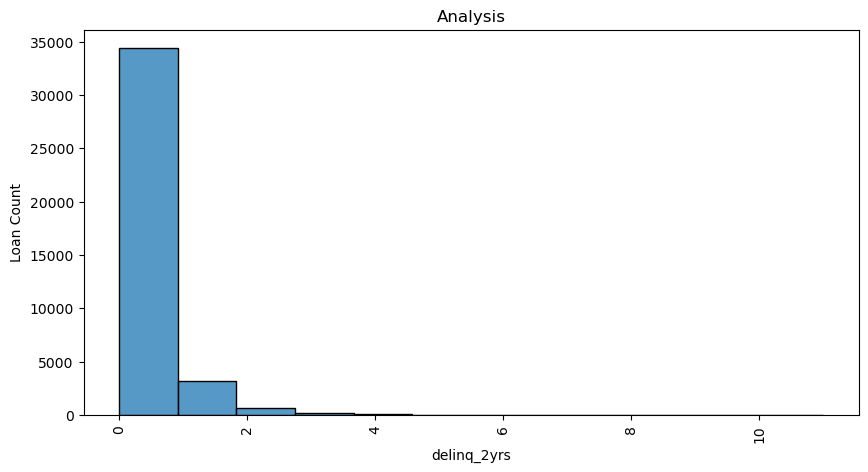

In [838]:
# Shows the distrbution of loan count vs delinq_2yrs

histogram(df_clean, xattr="delinq_2yrs", xlabel="delinq_2yrs", ylabel="Loan Count", title="Analysis", isKDE=False, bins=12)

In [839]:
df_clean.groupby(by="delinq_2yrs", sort=True)["delinq_2yrs"].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)

,delinq_2yrs,Count
0,0,34386
1,1,3207
2,2,673
3,3,212
4,4,60
5,5,21
6,6,10
7,7,4
8,8,2
9,9,1


<b>This analysis shows that maximum loan applications donot have delinquency instances. And number of loan application decreases with increase in deliquency instances.</b>

In [124]:
df_clean.delinq_2yrs.describe()

count    37874.000000
mean         0.144954
std          0.490078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [841]:
df_deq= df_clean[df_clean.delinq_2yrs>0]

<Axes: xlabel='loan_status', ylabel='delinq_2yrs'>

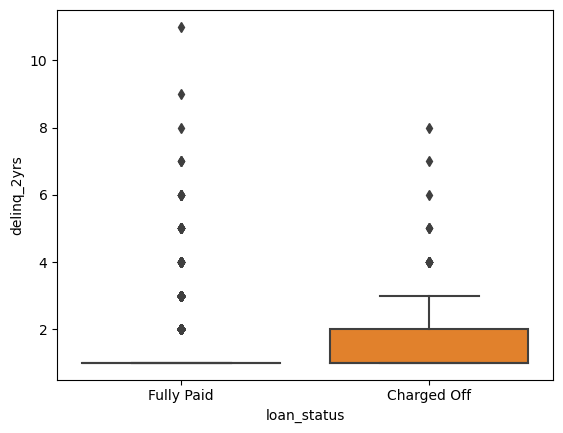

In [843]:
sns.boxplot(data=df_deq, y="delinq_2yrs", x="loan_status")

The boxplot shows that borrowers who have atleast one instance of delinquency for monthly emi in the last 2 years. It shows there is no clear demarkation of borrowers as they can either turn out to be finally non-defaulter or defaulter. Though there is greater chance to charged off in case borrowers have 1-2 instances of default in the last 2 years. 

#### loan_amnt

- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- <b><i>This is a quantitative categorical variable.</i></b>

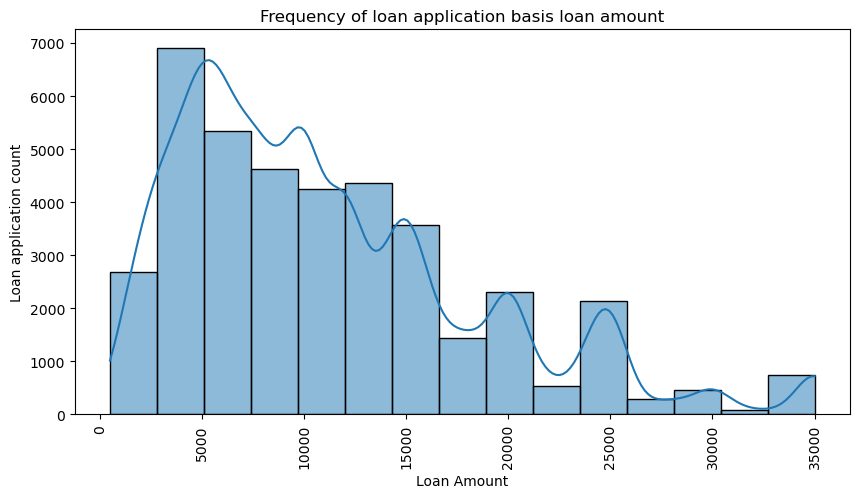

In [193]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="loan_amnt", bins=15, kde=True)
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

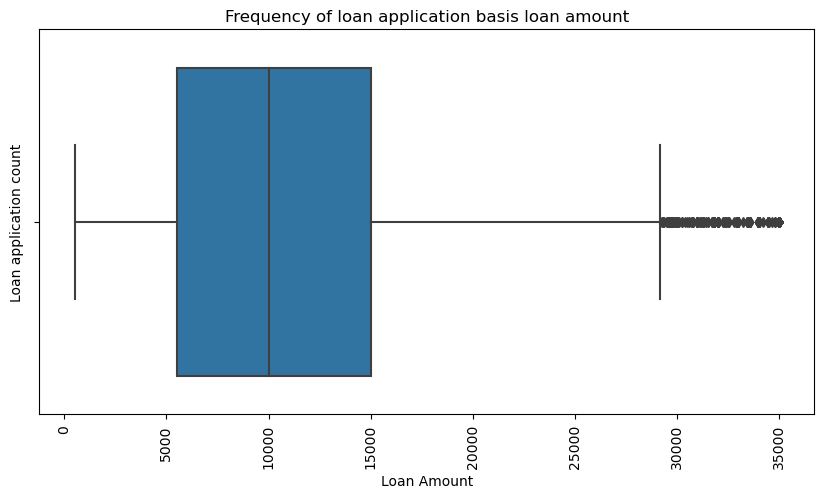

In [197]:
# Box Plot

plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x="loan_amnt")
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

In [196]:
df_clean.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [215]:
#Analysis of Loan Amount
print("Analysis")
print("1. Median loan amount: ", np.quantile(df_clean.loan_amnt, 0.5))
print("2. IQR of loan amount: ", np.quantile(df_clean.loan_amnt, 0.25),"(25%)-",np.quantile(df_clean.loan_amnt, 0.75),"(75%)")
print("3. Min loan amount: ", np.quantile(df_clean.loan_amnt, 0))
print("4. Max loan amount: ", np.quantile(df_clean.loan_amnt, 1))
print("5. Density distribution of loan amount is maximum in the range around ",np.quantile(df_clean.loan_amnt, 0.25),"-",np.quantile(df_clean.loan_amnt, 0.75))

Analysis
1. Median loan amount:  10000.0
2. IQR of loan amount:  5500.0 (25%)- 15000.0 (75%)
3. Min loan amount:  500
4. Max loan amount:  35000
5. Density distribution of loan amount is maximum in the range around  5500.0 - 15000.0


In [217]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### funded_amnt

- The total amount committed to that loan at that point in time.

- <b><i>This is a quantitative categorical variable.</i></b>

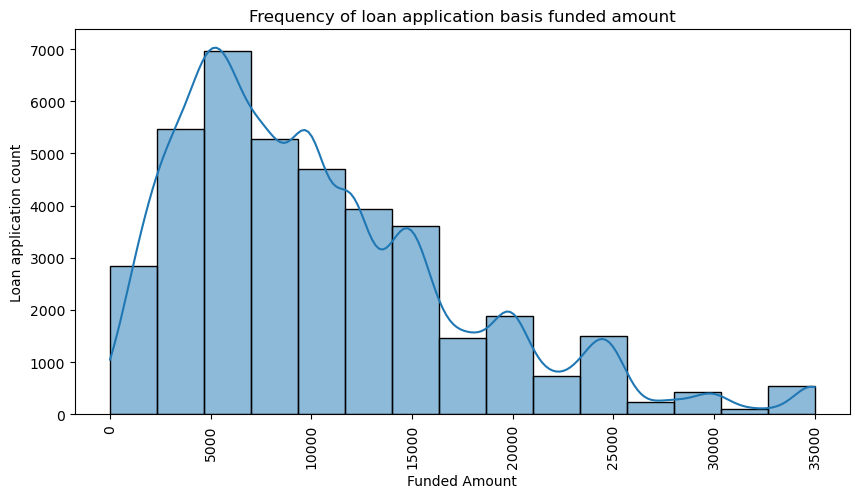

In [222]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="funded_amnt", bins=15, kde=True)
plt.xticks(rotation=90)
plt.xlabel("Funded Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis funded amount")
plt.show()

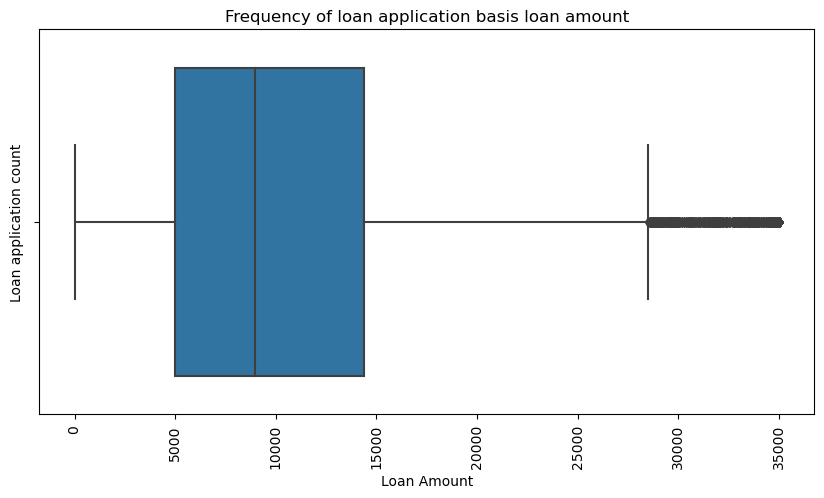

In [223]:
# Box Plot

plt.figure(figsize=(10,5))
sns.boxplot(data=df_clean, x="funded_amnt")
plt.xticks(rotation=90)
plt.xlabel("Loan Amount")
plt.ylabel("Loan application count")
plt.title("Frequency of loan application basis loan amount")
plt.show()

In [221]:
#Analysis of Funded Amount
print("Analysis of Funded Amount")
print("1. Median: ", np.quantile(df_clean.funded_amnt, 0.5))
print("2. IQR: ", np.quantile(df_clean.funded_amnt, 0.25),"(25%)-",np.quantile(df_clean.funded_amnt, 0.75),"(75%)")
print("3. Min: ", np.quantile(df_clean.funded_amnt, 0))
print("4. Max: ", np.quantile(df_clean.funded_amnt, 1))
print("5. As per displot, Density distribution is maximum in the range around ",np.quantile(df_clean.funded_amnt, 0.25),"-",np.quantile(df_clean.funded_amnt, 0.75))

Analysis of Funded Amount
1. Median:  9600.0
2. IQR:  5400.0 (25%)- 15000.0 (75%)
3. Min:  500
4. Max:  35000
5. Density distribution is maximum in the range around  5400.0 - 15000.0


In [225]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Term

- The number of payments on the loan. Values are in months and can be either 36 or 60.

- <b><i>This is a ordered categorical variable.</i></b>

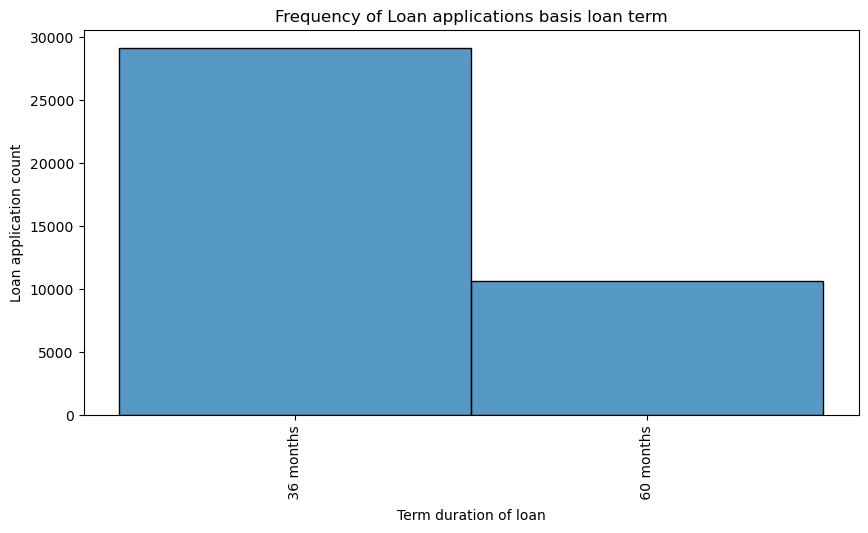

In [226]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="term")
plt.xticks(rotation=90)
plt.xlabel("Term duration of loan")
plt.ylabel("Loan application count")
plt.title("Frequency of Loan applications basis loan term")
plt.show()

#### Analysis

- More loans are for a period of 36 months compared to 60 months

#### int_rate

- Interest Rate on the loan

- <b><i>This is a ordered categorical variable.</i></b>

In [239]:
# Checking the unique values of interest rate

df_clean.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [258]:
# Converting interest rate to a integer by data manipulation(removing % and rounding off to nearest integer)
# Adding a new interest rate column

df_clean["int_rate_round"] = df_clean.int_rate.apply(lambda x: int(np.round(float(x.replace("%",'')))))

In [259]:
# Fetch all unique interest rate values

df_clean.int_rate_round.unique()

array([11, 15, 16, 13,  8, 19, 21, 10,  6, 12, 14, 17,  9, 18,  7, 20, 22,
       24, 23,  5, 25])

In [260]:
df_clean.int_rate_round.head()

0    11
1    15
2    16
3    13
4    13
Name: int_rate, dtype: int64

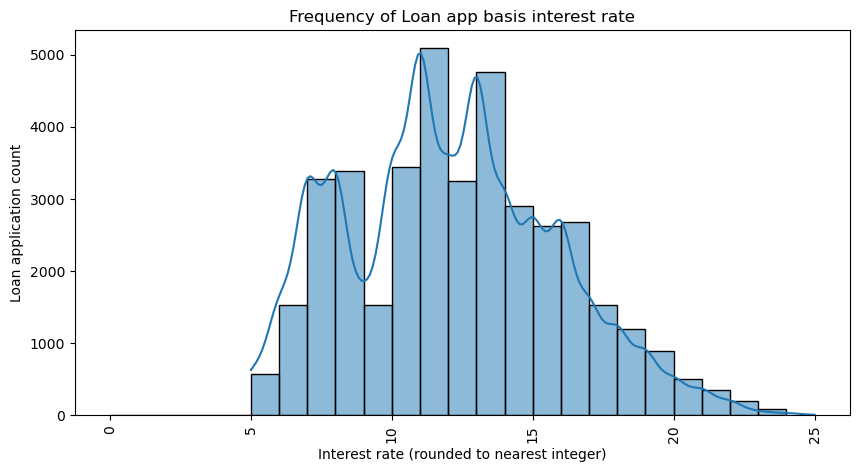

In [263]:
# Distribution Plot

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean, x="int_rate_round", bins=np.arange(0,25), kde=True)
plt.xticks(rotation=90)
plt.xlabel("Interest rate (rounded to nearest integer)")
plt.ylabel("Loan application count")
plt.title("Frequency of Loan app basis interest rate")
plt.show()

In [268]:
df_clean.int_rate_round.describe()

count    39717.000000
mean        12.011229
std          3.717187
min          5.000000
25%          9.000000
50%         12.000000
75%         15.000000
max         25.000000
Name: int_rate, dtype: float64

#### Analysis

- Maximum loan application have rounded interest rate ranging from 7% to 16% as found in the above distrbution plot.

In [270]:
df_clean.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'int_rate_round'],
      dtype='object')

In [271]:
df_clean.installment.unique()

array([162.87,  59.83,  84.33, ...,  78.42, 275.38, 255.43])

In [272]:
df_clean.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64